In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = r"Data\\"

In [8]:
from TransformData import transform_data
data_generator = transform_data(path = path + 'train.csv')
data = data_generator.get_data(train_or_analysis = 'analysis')

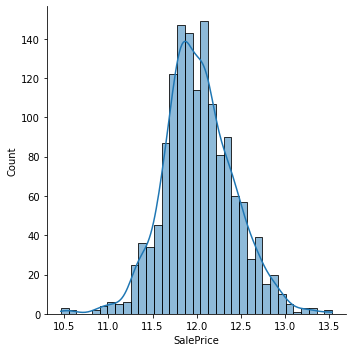

In [9]:
sns.displot(data.SalePrice, kde = True)